### Two prominent methods of time series prediction: univariate and multivariate.
    Univariate uses only the previous values in the time series to predict future values. 
    Multivariate also uses external variables in addition to the series of values to create the forecast. 
    An ARIMA model has three component functions: 
    AR (p), the number of lag observations or autoregressive terms in the model; 
    I (d), the difference in the nonseasonal observations; 
    and MA (q), the size of the moving average window.
     An ARIMA model order is depicted as (p,d,q) with values for the order or number of times the function occurs in running the model.
     The ARIMA model uses differenced data to make the data stationary, which means there’s a consistency of the data over time. This function removes the effect of trends or seasonality, such as market or economic data.
## AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
## I: Integrated. The use of differencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
## MA: Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [1]:
# Load our dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Note it should be in same dir
df=pd.read_csv('BTC_USD_2025.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])      # ensure Date is a datetime type
df['Year'] = df['Date'].dt.year  # add a separate column - year to df
df['Month'] = df['Date'].dt.month  # add a separate column - year to df
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,2014,9
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,2014,9
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,2014,9
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,2014,9
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,2014,9
...,...,...,...,...,...,...,...,...,...,...
3824,2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,0.0,0.0,2025,3
3825,2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,0.0,0.0,2025,3
3826,2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,30899345977,0.0,0.0,2025,3
3827,2025-03-10,80597.148438,83955.929688,77420.593750,78532.000000,54061099422,0.0,0.0,2025,3


In [5]:
import calendar

# Suppose df['Month'] has values like 1, 2, 3,... representing Jan, Feb, Mar,...
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])


In [6]:
df.set_index('Date',inplace = True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,2014,September
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,2014,September
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,2014,September
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,2014,September
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,2014,September
...,...,...,...,...,...,...,...,...,...
2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,0.0,0.0,2025,March
2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,0.0,0.0,2025,March
2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,30899345977,0.0,0.0,2025,March


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Year', 'Month'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3829 entries, 2014-09-17 to 2025-03-11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3829 non-null   float64
 1   High          3829 non-null   float64
 2   Low           3829 non-null   float64
 3   Close         3829 non-null   float64
 4   Volume        3829 non-null   int64  
 5   Dividends     3829 non-null   float64
 6   Stock Splits  3829 non-null   float64
 7   Year          3829 non-null   int32  
 8   Month         3829 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 284.2+ KB


In [9]:
df.drop(['Dividends','Stock Splits'], axis = 1)

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,September
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,September
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,September
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,September
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,September
...,...,...,...,...,...,...,...
2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,2025,March
2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,2025,March
2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,30899345977,2025,March


<Axes: xlabel='Date', ylabel='Close'>

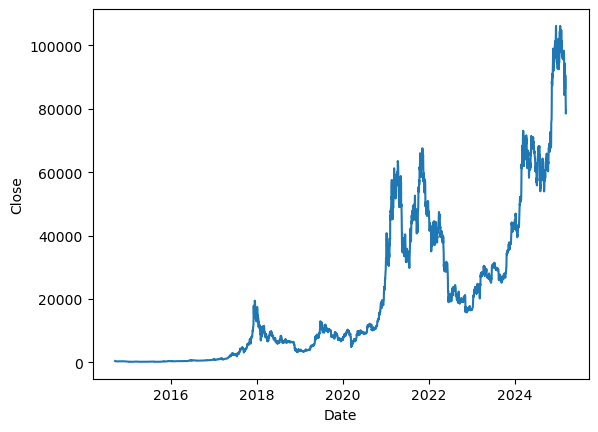

In [10]:
# sns.lineplot(data = df, x = 'Date',y ='Close') takes too much time
sns.lineplot(data =df, x=df.index, y = df.Close)

<Axes: xlabel='Year', ylabel='Close'>

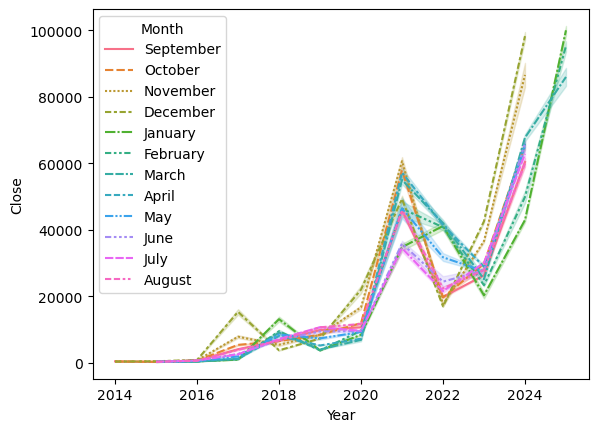

In [11]:
sns.lineplot(data=df, x="Year", y="Close", hue="Month", style ='Month')


### Stage 1: Make the data ='Close' from the data frame to be stationary
Methods USed:
1. Rolling Window MEthod
2. Augumented Dickey Roller Method (ADR)
    - Time shift Method
    - log method
    - Sqrt Method
    - Cuberoot Method
    - log sqrt Method
    -Cube sqrt MEthod

In [12]:
# Test 1 'Rolling Window'
# To check wheather the mean and vaiance are stationary or not with respect to time
# use Rolling window method
df['roll_mean'] = df.Close.rolling(window=12).mean()
df['roll_std'] = df.Close.rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Close'>

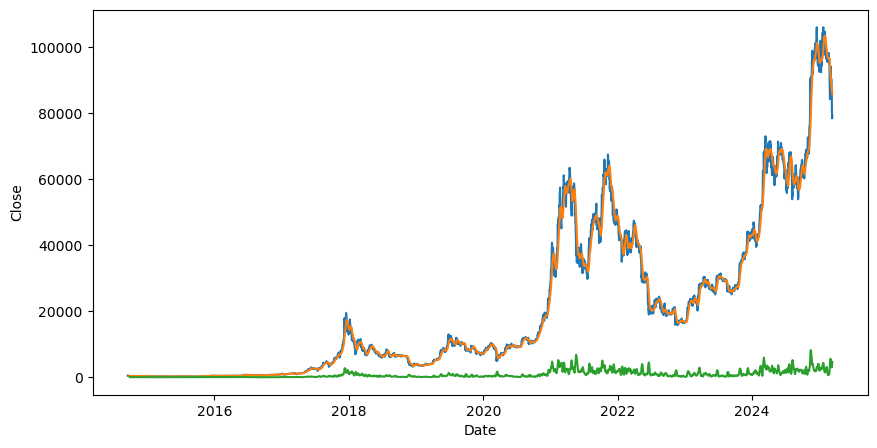

In [13]:
plt.figure(figsize =(10,5))
sns.lineplot(data = df, x = df.index, y = df.Close)
sns.lineplot(data = df, x = df.index, y = df.roll_mean)
sns.lineplot(data = df, x = df.index, y = df.roll_std)

Inference from the graph:
- the mean is varying w.r.t time and is non-stationary.
- the standard deviation is stationary and is not varying w.r.t time

In [14]:
# Test 2: ADF test (Augumented Dicky Fuller Test)
# Augmented Dickey-Fuller unit root test.

# The Augmented Dickey-Fuller test can be used to test for a unit root
#  in a univariate process in the presence of serial correlation
from statsmodels.tsa.stattools import adfuller
adf_Test = adfuller(df['Close'], autolag ='AIC') # AIC is Akaike Information Criteria
adf_Test 

(-0.7629377557224565,
 0.8297672031018924,
 29,
 3799,
 {'1%': -3.4320724859265566,
  '5%': -2.86230109957308,
  '10%': -2.567175143302213},
 63184.416671394574)

# Interpretation from ADF test:
If Test Statistics < Critical Value, then the data is stationary
here , the results in the order for ADT test are:
1. Test Statistic
2. P-value
3. lags used
4. No of observations used. 
So we will map the above menu with the ADF results

In [15]:
stats =pd.Series(adf_Test[0:4], index = ['Test Statistic','P-value','Lags used', 'No of observations used'])
stats

Test Statistic               -0.762938
P-value                       0.829767
Lags used                    29.000000
No of observations used    3799.000000
dtype: float64

### The last index of ADF test is a dictionary. So mapping again for better analysis


In [16]:
for key,values in adf_Test[4].items():
    print("criticality",key,":",values)

criticality 1% : -3.4320724859265566
criticality 5% : -2.86230109957308
criticality 10% : -2.567175143302213


# Inference
Time series said to be stationary if it does not exhibit trends (upward or downward) or seasonality i.e fluctuations/irregularities in the data are entirely due to outside factors and noise.
Condn for stationarity  is 'Test Statistic < critical value'
Here -0.762938 is not less than  -3.4320724859265566. so the data is non stationary
### Differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple differencing method calculates the difference between consecutive points.


So, to make/ to convert the data stationary, we can go for
 a. time shift
 b. log
 c. Square root, Cube
 d. Take log(data), then squareroot(data)
  Most convinient and simplest is : time shift to make the data stationary
  1. I am going to shift the data by one month. (we can shift by 6 months etc., our requiemnet)
  2. The stationarity test is enclosed in a function file as it has to be repeated again and again

In [17]:
# input arguments to the function test_stationary are df and the column'Close'
# here the stationarity has to be checked again and again.So a function file is created
def  test_stationary(dataFrame,var):
    dataFrame['roll_mean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['roll_std'] = dataFrame[var].rolling(window = 12).std()

    
    from statsmodels.tsa.stattools import adfuller
    adf_Test = adfuller(dataFrame[var], autolag='AIC')
    stats =pd.Series(adf_Test[0:4], index = ['Test Statistic','P-value','Lags used', 'No of observations used'])
    print(stats)

    for key,values in adf_Test[4].items():
        print("criticality",key,":",values)
    
    plt.figure(figsize =(6,4))
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = var, label = var)
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'roll_mean', label = 'roll_mean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'roll_std', label ='rolling_std')
     
    

Test Statistic               -0.762938
P-value                       0.829767
Lags used                    29.000000
No of observations used    3799.000000
dtype: float64
criticality 1% : -3.4320724859265566
criticality 5% : -2.86230109957308
criticality 10% : -2.567175143302213


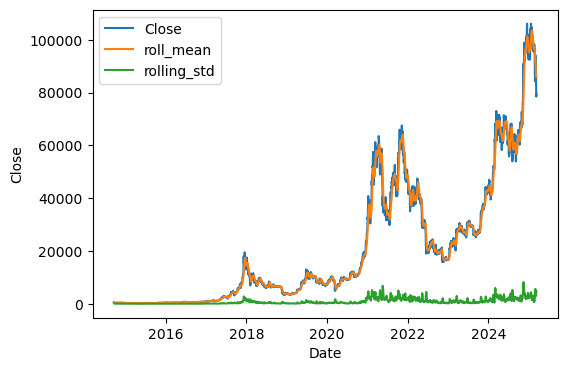

In [18]:
test_stationary(df,'Close')

### Bitcoin data 'Close' is transformed using 1. Shift method to make it stationary

In [19]:
#  bc_shift_df = df['Close']
bc_shift_df = df[['Close']] # index is Date
bc_shift_df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-07,86742.671875
2025-03-08,86154.593750
2025-03-09,80601.039062


In [20]:
# time shift the output data - 'Close' to make it stationary
bc_shift_df['shift'] = bc_shift_df.Close.shift() # shift by 1 month
# bc_shift_df['shift']


C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3298819827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_shift_df['shift'] = bc_shift_df.Close.shift() # shift by 1 month


In [21]:
bc_shift_df.fillna(method='bfill', inplace=True)
# bc_shift_df['shiftDiff'].dropna() otherwise drop na
bc_shift_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32604\2901886444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bc_shift_df.fillna(method='bfill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_32604\2901886444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_shift_df.fillna(method='bfill', inplace=True)


,Close,shift
Date,,
2014-09-17,457.334015,457.334015
2014-09-18,424.440002,457.334015
2014-09-19,394.795990,424.440002
2014-09-20,408.903992,394.795990
2014-09-21,398.821014,408.903992


In [22]:
bc_shift_df['shiftDiff'] = bc_shift_df['Close'] -bc_shift_df['shift']
# bc_shift_df['shiftDiff'] = bc_shift_df.Close - bc_shift_df['shift']
bc_shift_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3521010185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_shift_df['shiftDiff'] = bc_shift_df['Close'] -bc_shift_df['shift']


,Close,shift,shiftDiff
Date,,,
2014-09-17,457.334015,457.334015,0.000000
2014-09-18,424.440002,457.334015,-32.894012
2014-09-19,394.795990,424.440002,-29.644012
2014-09-20,408.903992,394.795990,14.108002
2014-09-21,398.821014,408.903992,-10.082977


C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_mean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_std'] = dataFrame[var].rolling(window = 12).std()


Test Statistic            -8.780602e+00
P-value                    2.382452e-14
Lags used                  3.000000e+01
No of observations used    3.798000e+03
dtype: float64
criticality 1% : -3.432072939758102
criticality 5% : -2.86230130004556
criticality 10% : -2.567175250026274


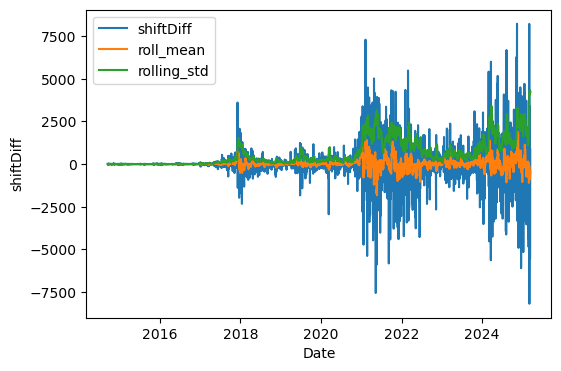

In [23]:
test_stationary(bc_shift_df,'shiftDiff')

### Bitcoin data 'Close' is transformed using 2. Log method to make it stationary

In [24]:
bc_log_df = df[['Close']]
bc_log_df.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [25]:
bc_log_df['log'] =np.log(bc_log_df['Close'])
bc_log_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3559274576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_log_df['log'] =np.log(bc_log_df['Close'])


,Close,log
Date,,
2014-09-17,457.334015,6.125414
2014-09-18,424.440002,6.050771
2014-09-19,394.795990,5.978369
2014-09-20,408.903992,6.013480
2014-09-21,398.821014,5.988513


C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_mean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_std'] = dataFrame[var].rolling(window = 12).std()


Test Statistic               -0.939966
P-value                       0.774526
Lags used                    10.000000
No of observations used    3818.000000
dtype: float64
criticality 1% : -3.4320639083268323
criticality 5% : -2.8622973105564014
criticality 10% : -2.5671731261722135


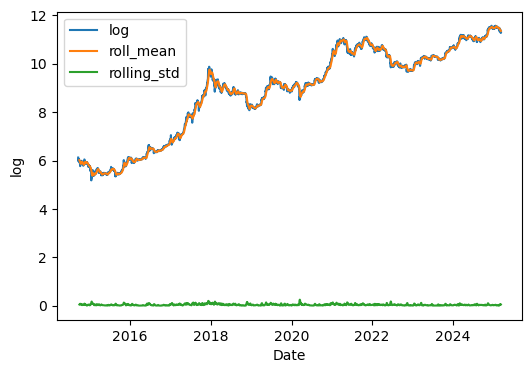

In [26]:
test_stationary(bc_log_df,'log')

### Bitcoin data 'Close' is transformed using 3. Sqrt method to make it stationary

In [27]:
bc_sqrt_df = df[['Close']]
bc_sqrt_df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-07,86742.671875
2025-03-08,86154.593750
2025-03-09,80601.039062


In [28]:
bc_sqrt_df['sqrt'] =np.sqrt(bc_sqrt_df['Close'])
bc_sqrt_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32604\966835583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_sqrt_df['sqrt'] =np.sqrt(bc_sqrt_df['Close'])


,Close,sqrt
Date,,
2014-09-17,457.334015,21.385369
2014-09-18,424.440002,20.601942
2014-09-19,394.795990,19.869474
2014-09-20,408.903992,20.221375
2014-09-21,398.821014,19.970504


C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_mean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_std'] = dataFrame[var].rolling(window = 12).std()


Test Statistic               -0.538063
P-value                       0.884372
Lags used                    29.000000
No of observations used    3799.000000
dtype: float64
criticality 1% : -3.4320724859265566
criticality 5% : -2.86230109957308
criticality 10% : -2.567175143302213


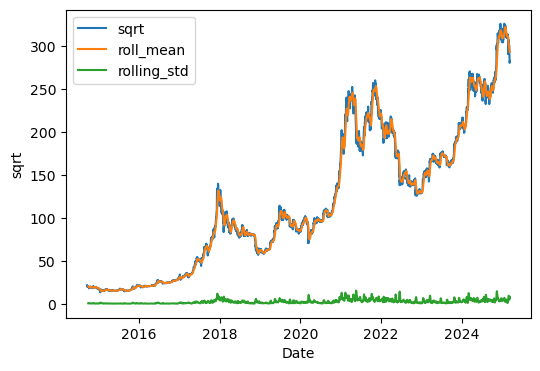

In [29]:
test_stationary(bc_sqrt_df,'sqrt')

### Bitcoin data 'Close' is transformed using 4. Cube root method to make it stationary

In [30]:
bc_croot_df =df[['Close']]
bc_croot_df['cuberoot'] = np.cbrt(bc_croot_df['Close'])
bc_croot_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3241132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_croot_df['cuberoot'] = np.cbrt(bc_croot_df['Close'])


,Close,cuberoot
Date,,
2014-09-17,457.334015,7.704501
2014-09-18,424.440002,7.515169
2014-09-19,394.795990,7.335971
2014-09-20,408.903992,7.422333
2014-09-21,398.821014,7.360817


C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_mean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_32604\3289291082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['roll_std'] = dataFrame[var].rolling(window = 12).std()


Test Statistic               -0.475679
P-value                       0.896676
Lags used                    10.000000
No of observations used    3818.000000
dtype: float64
criticality 1% : -3.4320639083268323
criticality 5% : -2.8622973105564014
criticality 10% : -2.5671731261722135


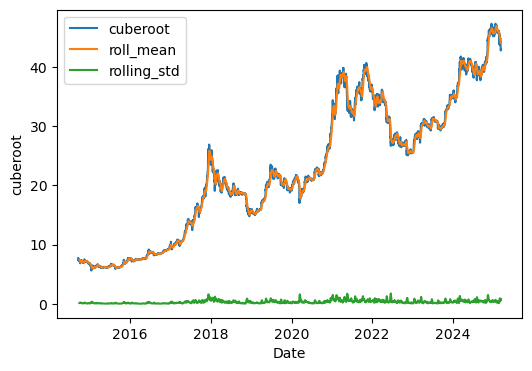

In [31]:
test_stationary(bc_croot_df,'cuberoot')

Based on the ADF test results, of 1. log  2. Time shift   3. sqrt method 4. cube root method

the 'Time shift' with the lowest p‑value (and a Test Statistic more negative than the critical value) provides the strongest evidence of stationarity. by comparing the AGF results the p- value:

Log transform: p ≈ 0.77
Time Shift (likely a first difference): p ≈ 2.38e‑14
Square root: p ≈ 0.88
Cube root: p ≈ 0.90
Only the “Time Shift” method shows a very low p‑value (< 0.05), meaning you can reject the null hypothesis of a unit root and conclude the series is (at least approximately) stationary. Thus, the Time Shift approach appears best at producing a stationary series in this comparison.

The other methods to make the data stationary are 5. log sqrt 6. log shiftDiff  7. log cuberoot

### Stage 2: ARIMA MODEL

In [32]:
# create a new dataframe from the original and keep a copy of it
bc_arima_df = df[['Close']].copy(deep = True)
bc_arima_df.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [33]:
bc_arima_df['firstDiff'] = bc_arima_df['Close'].diff() # time shifting done here
bc_arima_df['Diff_12'] =bc_arima_df['Close'].diff(12) # time shifting by 12 months
bc_arima_df.head()

,Close,firstDiff,Diff_12
Date,,,
2014-09-17,457.334015,NaN,NaN
2014-09-18,424.440002,-32.894012,NaN
2014-09-19,394.795990,-29.644012,NaN
2014-09-20,408.903992,14.108002,NaN
2014-09-21,398.821014,-10.082977,NaN


In [34]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ARIMA Model (p,d,q)
AR -Auto Regressive  (p)
I - Integrated   (d)
MA - Moving Average (q)

order = [p,d,q]

1.  d  denotes  (I) Integration

d =1 , when we shift the data by 1 time step, then we find the difference
d = 12, when we shift the data by 12 time steps, then we find the difference

2. p denotes Partial Auto Correlation Function (PACF)

3. q denotes Moving average  | Auto Correlation (use ACF)

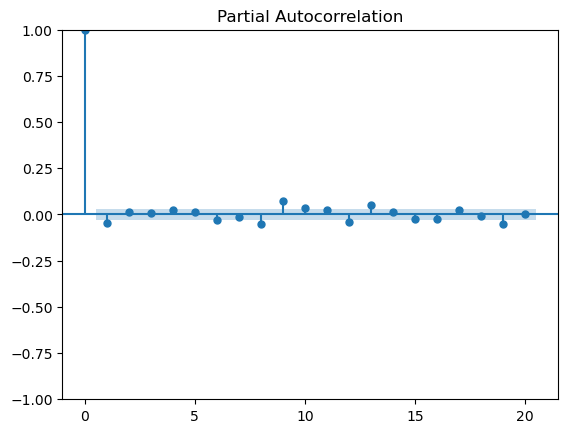

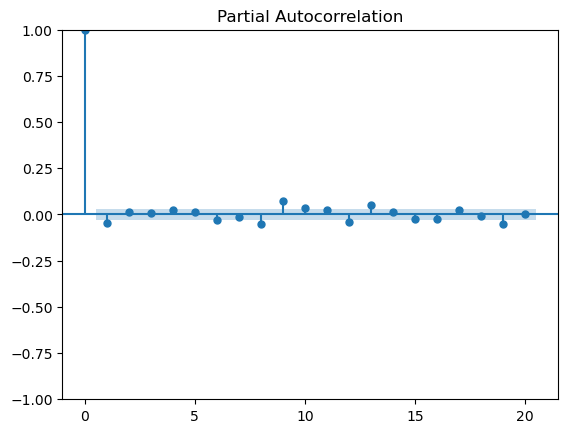

In [35]:
plot_pacf(bc_arima_df['firstDiff'].dropna(), lags = 20)
# the points outside the shaded region(outliers) are called significant area
# This graph decides p here it can be p =1 or 2

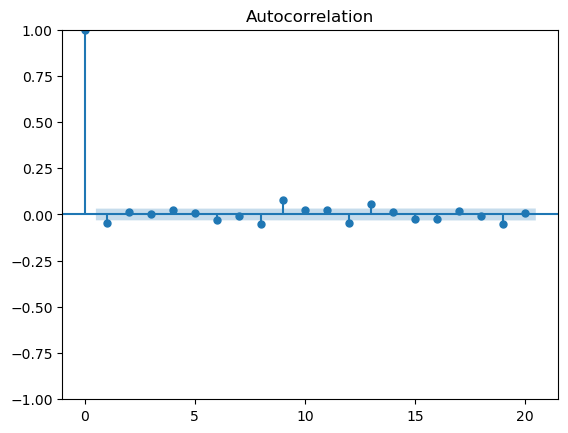

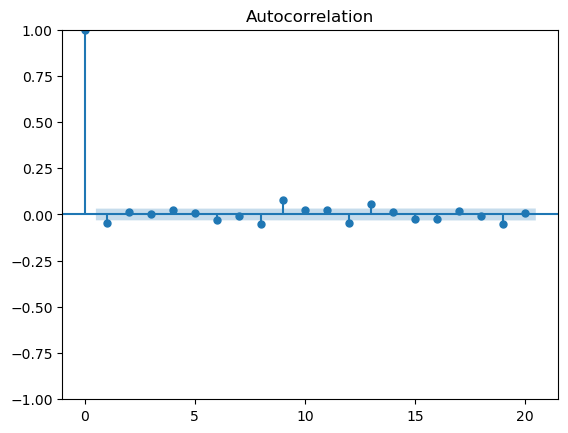

In [36]:
plot_acf(bc_arima_df['firstDiff'].dropna(), lags = 20)
# from graph q = 1 or 2
# already d = 1 time shift

In [37]:
# splitting training and testing data (70% +30%)
round(len(bc_arima_df)*0.7)
train_data = bc_arima_df[:round(len(bc_arima_df)*0.7)] # first 70%
train_data.tail()

,Close,firstDiff,Diff_12
Date,,,
2022-01-13,42591.570312,-1357.531250,-5095.242188
2022-01-14,43099.699219,508.128906,-4245.519531
2022-01-15,43177.398438,77.699219,-3280.718750
2022-01-16,43113.878906,-63.519531,-2783.695312
2022-01-17,42250.550781,-863.328125,-1318.453125


In [38]:

test_data = bc_arima_df[round(len(bc_arima_df)*0.7):] # last 30%
test_data.head()

,Close,firstDiff,Diff_12
Date,,,
2022-01-18,42375.632812,125.082031,-785.296875
2022-01-19,41744.328125,-631.304688,186.425781
2022-01-20,40680.417969,-1063.910156,-1053.523438
2022-01-21,36457.316406,-4223.101562,-5454.285156
2022-01-22,35030.250000,-1427.066406,-6791.011719


In [39]:
# p = 1 or 2; d = 1; q = 1 or 2
model = ARIMA(train_data['Close'], order = (1,1,2))
model_fit = model.fit()
prediction = model_fit.predict(start = test_data.index[0], end = test_data.index[-1])
bc_arima_df['arima_prediction'] = prediction
bc_arima_df.tail()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Close,firstDiff,Diff_12,arima_prediction
Date,,,,
2025-03-07,86742.671875,-3219.054688,-9531.250000,40894.031638
2025-03-08,86154.593750,-588.078125,-5263.578125,40894.031638
2025-03-09,80601.039062,-5553.554688,-8135.132812,40894.031638
2025-03-10,78532.000000,-2069.039062,-5815.023438,40894.031638
2025-03-11,79393.367188,861.367188,-5310.859375,40894.031638


<Axes: xlabel='Date', ylabel='Close'>

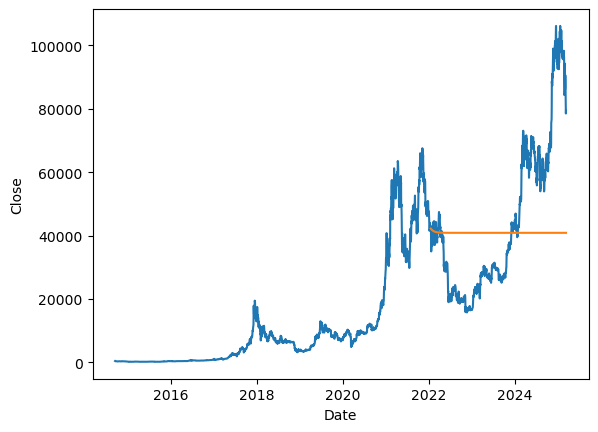

In [40]:
# plotting predicted dta
bc_arima_df.dropna()
sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'Close')
sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'arima_prediction')
# sns.lineplot(data = train_data, x = train_data.index , y = 'Close')
# sns.lineplot(data = test_data, x = test_data.index , y = 'Close')

In [41]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data['Close'],prediction))

24427.142604632496

### ARIMA model gives large MSE and RMSE. So we will try Seasonal ARIMA model ---> SARIMAX

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
bc_arima_df.head()

,Close,firstDiff,Diff_12,arima_prediction
Date,,,,
2014-09-17,457.334015,NaN,NaN,NaN
2014-09-18,424.440002,-32.894012,NaN,NaN
2014-09-19,394.795990,-29.644012,NaN,NaN
2014-09-20,408.903992,14.108002,NaN,NaN
2014-09-21,398.821014,-10.082977,NaN,NaN


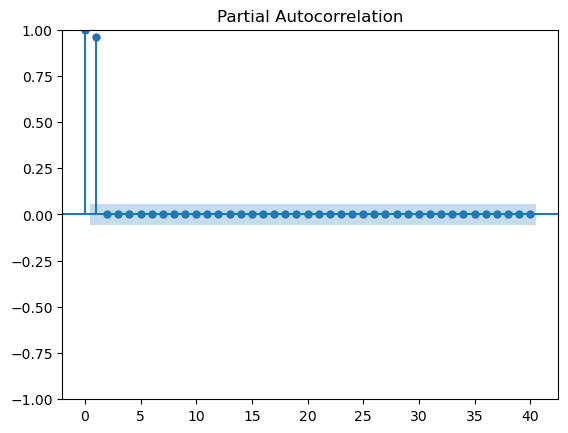

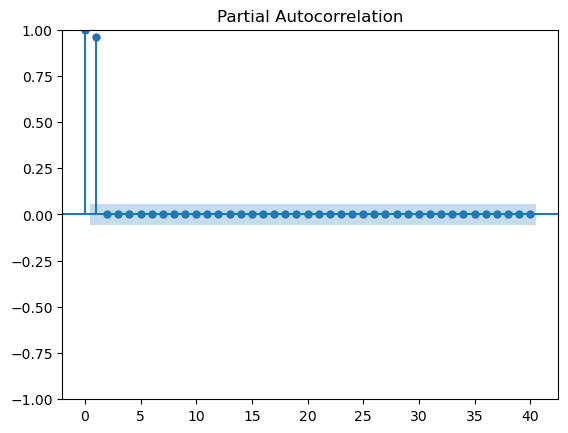

In [43]:
plot_pacf(bc_arima_df['arima_prediction'].dropna(), lags = 40)
# graph shows p =2

In [44]:
# # seasonal ARIMAX includes (p,d,q, seasonal no)
# model = SARIMAX(train_data['Close'], order = (2,1,1), seasonal_order=(2,1,1,5))
# model_fit = model.fit()
# prediction = model_fit.predict(start = test_data.index[0], end = test_data.index[-1])
# bc_arima_df['sarimax_prediction'] = prediction
# bc_arima_df.tail()

In [45]:
# # plotting predicted dta
# bc_arima_df.dropna()
# sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'Close')
# sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'sarimax_prediction')

In [ ]:
from itertools import product
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        # model = SARIMAX(train_data['Close'], order = (2,1,1), seasonal_order=(2,1,1,5))
        model=sm.tsa.statespace.SARIMAX(train_data['Close'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [53]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters           aic
48  (2, 2, 0, 1)   4869.623282
5   (0, 0, 2, 1)  43012.021006
23  (1, 0, 2, 1)  43012.129035
11  (0, 1, 2, 1)  43012.157352
17  (0, 2, 2, 1)  43013.987012
                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2680
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2428.812
Date:                              Thu, 13 Mar 2025   AIC                           4869.623
Time:                                      16:36:46   BIC                           4904.956
Sample:                                  09-17-2014   HQIC                          4882.408
                                       - 01-17-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025    

In [64]:
# # seasonal ARIMAX includes (p,d,q, seasonal no)
model = SARIMAX(train_data['Close'], order = (0,2,2), seasonal_order=(0,2,2,1))
model_fit = model.fit()
prediction = model_fit.predict(start = test_data.index[0], end = test_data.index[-1])
bc_arima_df['sarimax_prediction'] = prediction
bc_arima_df.tail()


ValueError: Seasonal periodicity must be greater than 1.

<Axes: xlabel='Date', ylabel='Close'>

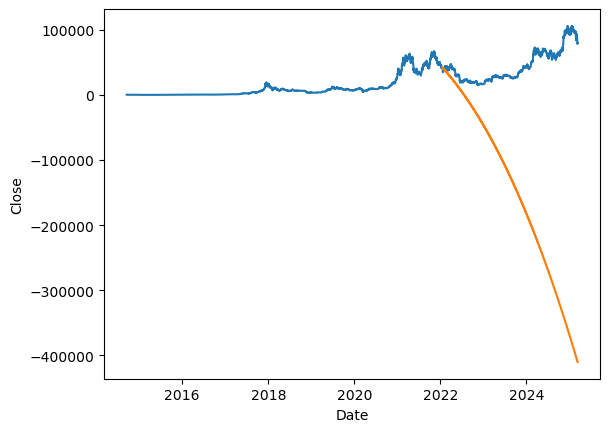

In [63]:
# plotting predicted dta
bc_arima_df.dropna()
sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'Close')
sns.lineplot(data = bc_arima_df, x = bc_arima_df.index , y = 'sarimax_prediction')